In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dc.csv')
df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [6]:
df.drop(columns={'open_SAR', 'high_SAR', 'low_SAR', 'close_USD','open_USD', 'high_USD', 'low_USD', 'volume'}, inplace=True)
df.head()

,Unnamed: 0,close_SAR
0,2021-01-30,128333.212416
1,2021-01-29,128459.450880
2,2021-01-28,125131.570944
3,2021-01-27,113885.208960
4,2021-01-26,121767.124608


In [7]:
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,close_SAR
date,
2021-01-30,128333.212416
2021-01-29,128459.450880
2021-01-28,125131.570944
2021-01-27,113885.208960
2021-01-26,121767.124608


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

close_SAR    0
dtype: int64

In [11]:
df1 = df.copy()
df1.dropna(inplace=True)
df1['day'] = df1.index.day
df1['month'] = df1.index.month
df1['year'] = df1.index.year
df1['dayofweek'] = df1.index.dayofweek
df1['dayofyear'] = df1.index.dayofyear

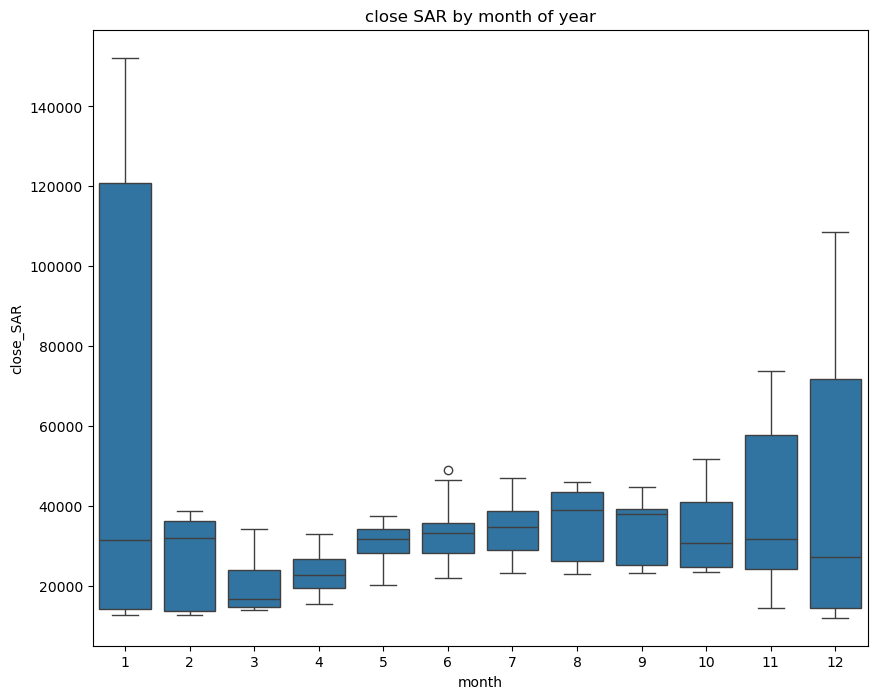

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df1, x='month', y='close_SAR')
ax.set(title='close SAR by month of year')
plt.show()

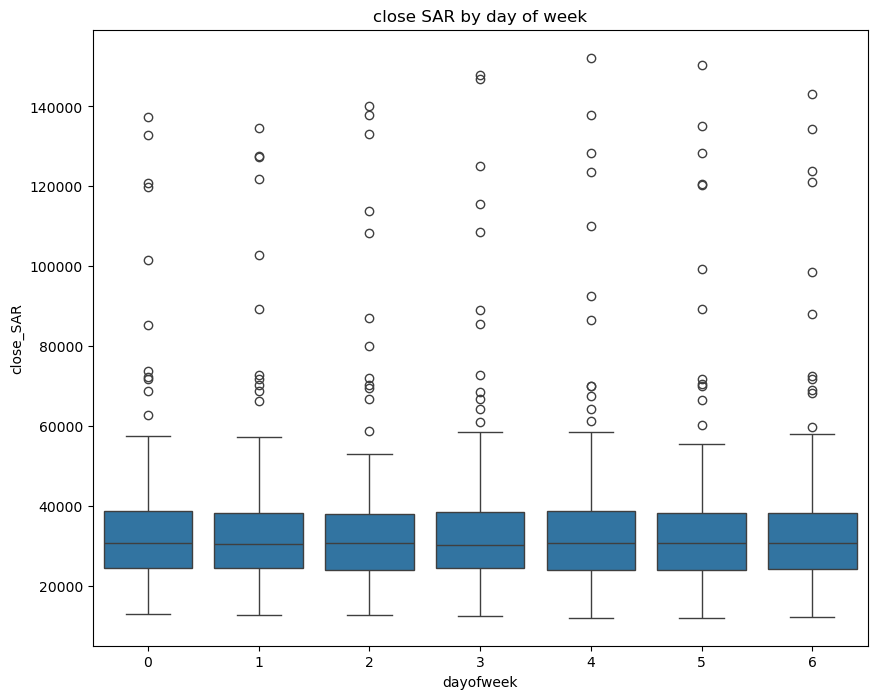

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df1, x='dayofweek', y='close_SAR')
ax.set(title='close SAR by day of week')
plt.show()

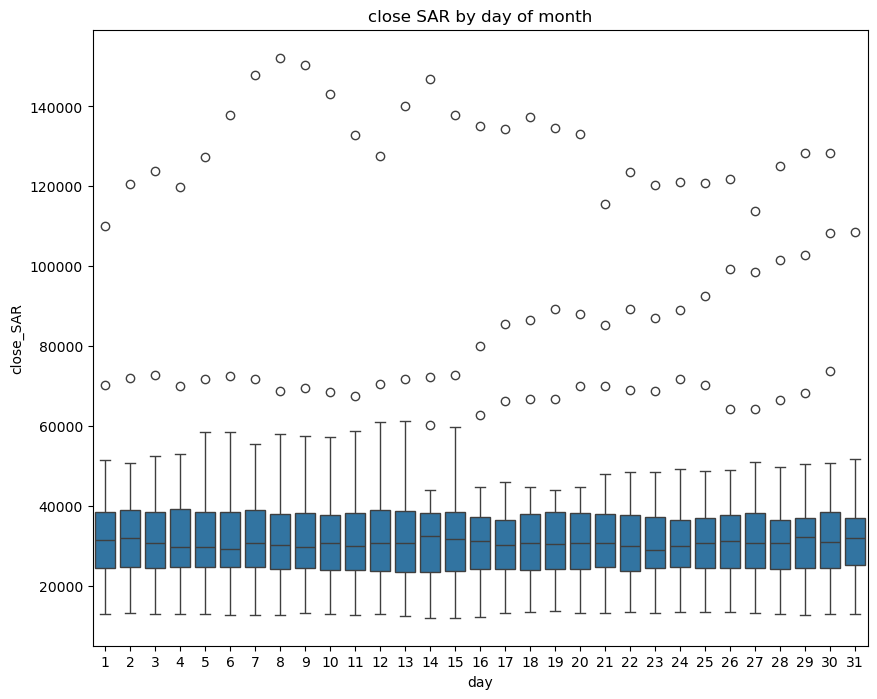

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df1, x='day', y='close_SAR')
ax.set(title='close SAR by day of month')
plt.show()


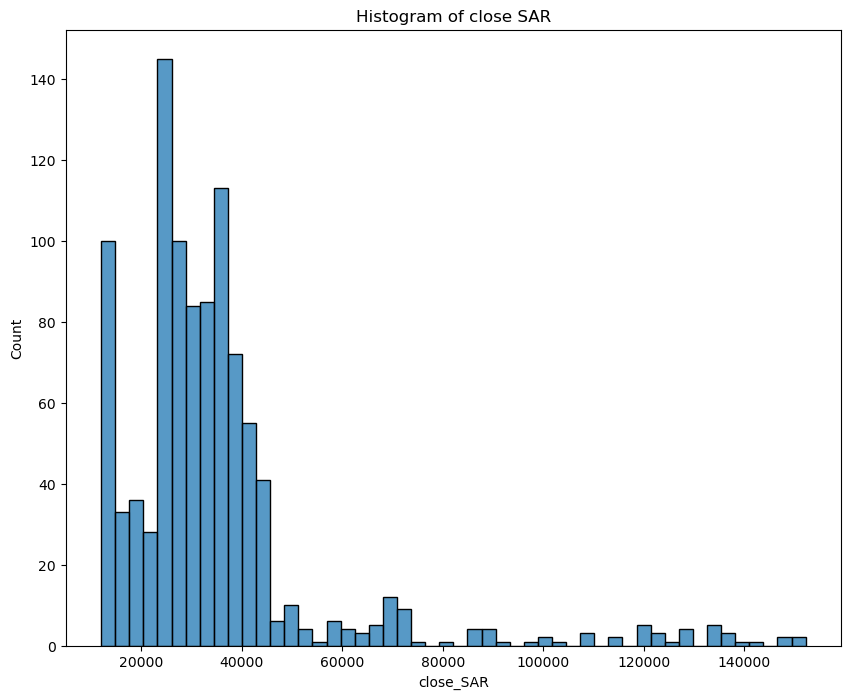

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df1, x='close_SAR')
ax.set(title='Histogram of close SAR')
plt.show()

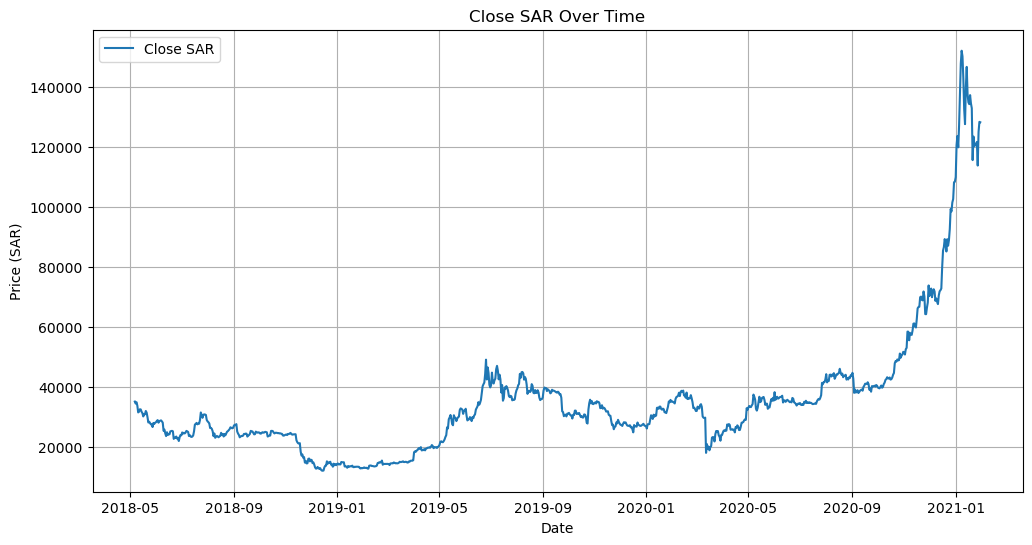

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close_SAR'], label='Close SAR')
plt.title('Close SAR Over Time')
plt.xlabel('Date')
plt.ylabel('Price (SAR)')
plt.legend()
plt.grid()
plt.show()


In [17]:

for lag in range(1, 8):
    df[f'lag{lag}'] = df['close_SAR'].shift(lag)

df.dropna(inplace=True)


df.head()



,close_SAR,lag1,lag2,lag3,lag4,lag5,lag6,lag7
date,,,,,,,,
2021-01-23,120305.331200,120987.528960,120966.151680,121767.124608,113885.208960,125131.570944,128459.450880,128333.212416
2021-01-22,123557.565568,120305.331200,120987.528960,120966.151680,121767.124608,113885.208960,125131.570944,128459.450880
2021-01-21,115700.327552,123557.565568,120305.331200,120987.528960,120966.151680,121767.124608,113885.208960,125131.570944
2021-01-20,133020.049792,115700.327552,123557.565568,120305.331200,120987.528960,120966.151680,121767.124608,113885.208960
2021-01-19,134607.444096,133020.049792,115700.327552,123557.565568,120305.331200,120987.528960,120966.151680,121767.124608


In [18]:
import statsmodels.formula.api as smf


model = smf.ols(formula='close_SAR ~ lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              close_SAR   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.188e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:58:51   Log-Likelihood:                -8759.9
No. Observations:                 992   AIC:                         1.754e+04
Df Residuals:                     984   BIC:                         1.757e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    301.3029    101.889      2.957      0.0

In [19]:
#mini-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7']] = scaler.fit_transform(df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7']])
df[['close_SAR']] = scaler.fit_transform(df[['close_SAR']])
df.head()

,close_SAR,lag1,lag2,lag3,lag4,lag5,lag6,lag7
date,,,,,,,,
2021-01-23,0.772423,0.777290,0.777138,0.782852,0.726616,0.806857,0.830601,0.829701
2021-01-22,0.795627,0.772423,0.777290,0.777138,0.782852,0.726616,0.806857,0.830601
2021-01-21,0.739567,0.795627,0.772423,0.777290,0.777138,0.782852,0.726616,0.806857
2021-01-20,0.863141,0.739567,0.795627,0.772423,0.777290,0.777138,0.782852,0.726616
2021-01-19,0.874467,0.863141,0.739567,0.795627,0.772423,0.777290,0.777138,0.782852


In [20]:
X = df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7']]
y = df['close_SAR']

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
}

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelname = []
modelmetrics = []
y_pred=[]
for nameModel, model in models.items():
    model.fit(x_train, y_train)
    modelname.append(nameModel)
    ypred = model.predict(x_test)
    y_pred.append(ypred)
    mse = mean_squared_error(y_test, ypred)
    mae=mean_absolute_error(y_test, ypred)
    
    
    modelmetrics.append({
        'Model': nameModel,
        'MSE': mse,
        'MAE':mae,
    })
modelmetrics_df = pd.DataFrame(modelmetrics)
modelmetrics_df

,Model,MSE,MAE
0,Linear Regression,0.000147,0.006519
1,Ridge Regression,0.000246,0.009457
2,Lasso Regression,0.015372,0.080755
3,Random Forest,0.000178,0.007120
4,Support Vector Machine,0.003210,0.053272
5,KNN,0.000195,0.008369
6,Gradient Boosting,0.000169,0.006952
7,Decision Tree,0.000354,0.009942
8,XGBoost,0.000225,0.007997


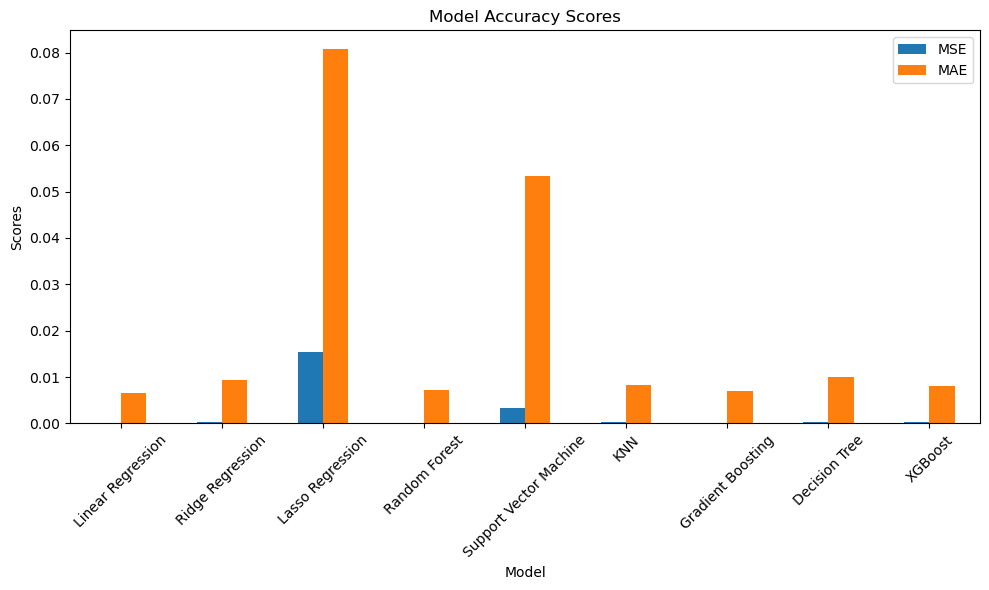

In [23]:
modelmetrics_df.set_index('Model',inplace=True)
modelmetrics_df.plot(kind='bar',figsize=(10,6))
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

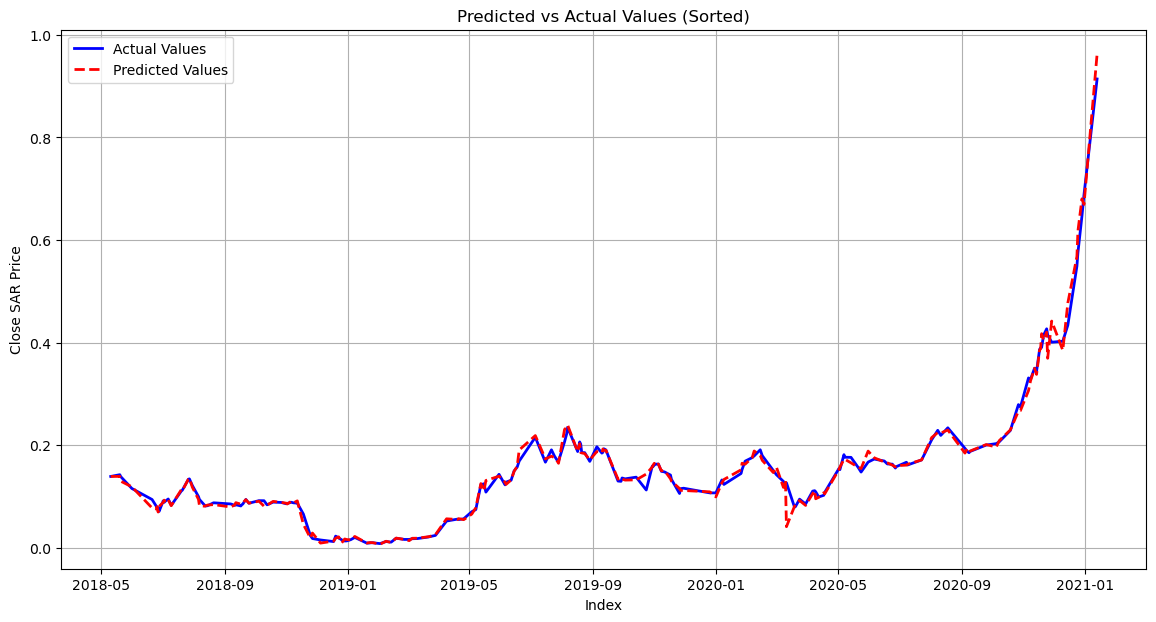

In [24]:
best_mse = float('inf')
best_model_name = None
best_model_pred = None
for i, name in enumerate(modelname):
    current_mse = mean_squared_error(y_test, y_pred[i])
    if current_mse < best_mse:
        best_mse = current_mse
        best_model_name = name
        best_model_pred = y_pred[i]

y_pred_series = pd.Series(best_model_pred, index=y_test.index)
y_pred_sorted = y_pred_series.sort_index()
y_test_sorted = y_test.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Values', color='blue', linewidth=2)
plt.plot(y_test_sorted.index, y_pred_sorted, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Values (Sorted)')
plt.xlabel('Index')
plt.ylabel('Close SAR Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'close_sar_forecast_model.pkl')


['close_sar_forecast_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']